# 3. Modelado Benchmark

In [1]:
import pandas as pd

# Cargar el dataframe limpio desde el archivo pickle
df = pd.read_pickle('data_limpia.pkl')

# Ver las primeras filas para confirmar que se cargó correctamente
print(df.head())
print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

    age  monthly_inhand_salary  num_bank_accounts  num_credit_card  \
0  23.0            1824.843333                3.0              4.0   
1  23.0            1426.204829                3.0              4.0   
2  40.8            2059.822083                3.0              4.0   
3  23.0            1661.386500                3.0              4.0   
4  23.0            1824.843333                3.0              4.0   

   interest_rate  delay_from_due_date  num_of_delayed_payment  \
0            3.0                    3                     7.0   
1            3.0                   -1                     7.6   
2            3.0                    3                     7.0   
3            3.0                    5                     4.0   
4            3.0                    6                     8.6   

   changed_credit_limit  num_credit_inquiries  outstanding_debt  ...  \
0                 11.27                   4.0            809.98  ...   
1                 11.27                   4.

### Contexto y Objetivo

En esta primera sección se realiza la lectura e inspección del conjunto de datos limpio que servirá como base para el proyecto de Machine Learning. Este paso es esencial para garantizar que la información con la que se trabajará ha sido correctamente procesada en etapas previas de limpieza y está lista para el análisis exploratorio y el modelado. El objetivo principal aquí es verificar la correcta carga del dataset, comprobar su estructura, y conocer sus dimensiones y variables disponibles.

### Descripción Técnica

El código utiliza la librería `pandas` para cargar el archivo `data_limpia.pkl`, el cual contiene el dataframe previamente depurado. La función `pd.read_pickle()` permite leer objetos de Python almacenados en formato binario, conservando los tipos de datos y la estructura original. Posteriormente, con `df.head()` se visualizan las primeras cinco filas del dataset, lo que permite verificar que las columnas y valores se cargaron correctamente. Con `df.shape` se obtiene la dimensión del conjunto de datos, que en este caso contiene 100,000 registros y 29 variables. Finalmente, `df.columns.tolist()` imprime la lista completa de columnas disponibles, confirmando la presencia de variables numéricas, categóricas y la variable objetivo (`credit_score`).

### Interpretación de Resultados

La salida confirma que el dataset fue cargado exitosamente y que posee una estructura adecuada para el análisis. Las primeras filas muestran variables financieras y demográficas como la edad (`age`), salario mensual (`monthly_inhand_salary`), número de cuentas bancarias (`num_bank_accounts`), historial de pagos (`delay_from_due_date`, `num_of_delayed_payment`) y diversas categorías de préstamos (`personal_loan`, `auto_loan`, `home_equity_loan`, entre otras). La variable objetivo `credit_score` toma valores como “Good”, indicando que se trata de un problema de clasificación multiclase enfocado en la evaluación del comportamiento crediticio. Este paso permite garantizar la consistencia y completitud del dataset, sentando las bases para el análisis exploratorio, la detección de patrones y la posterior construcción de modelos predictivos.


## K-Nearest Neighbors (KNN) Classifier

🚀 INICIANDO KNN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO KNN...

📈 EVALUANDO MODELO KNN...
📊 MÉTRICAS DEL MODELO KNN:
Accuracy : 0.7485
Precision (macro avg): 0.7251
Recall (macro avg): 0.7383
f1-Score (macro avg): 0.7311
CV Mean f1-score (macro avg): 0.7150
CV Std f1-score (macro avg): 0.0023

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.63      0.70      0.66      5349
        Poor       0.75      0.76      0.75      8699
    Standard       0.79      0.76      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000



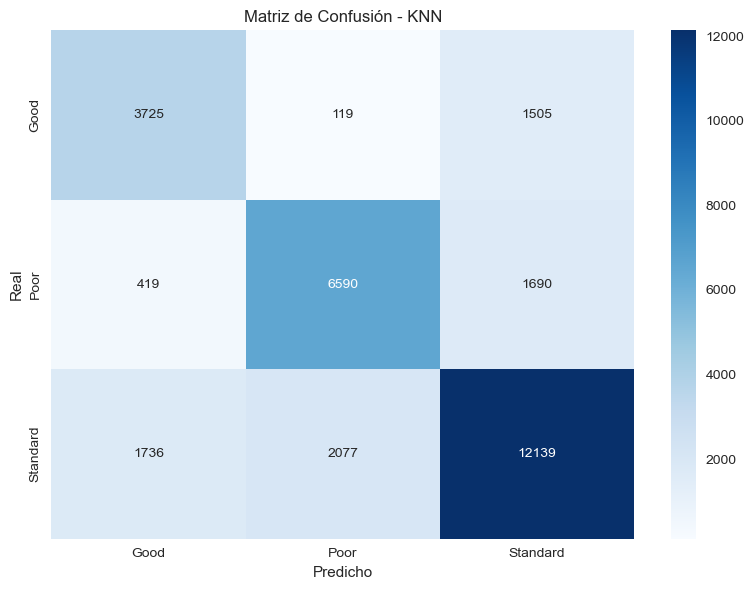


🎯 RESUMEN FINAL - KNN BENCHMARK
⏱️  Tiempo ejecución: 9.92s
📈 f1-score (macro avg): 0.7311 (73.11%)
🎯 Validación Cruzada: 0.7150 ± 0.0046
💾 Resultados guardados: 'knn_benchmark_results.pkl'


In [2]:
# =============================================================================
# KNN - MODELO BENCHMARK
# =============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO KNN - MODELO BENCHMARK...")
start_time = time.time()

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO KNN...")

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
)

knn_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = knn_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO KNN...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(knn_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO KNN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# VISUALIZACIONES
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - KNN')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - KNN BENCHMARK")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'knn_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'knn_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

En esta etapa se desarrolla el modelo **K-Nearest Neighbors (KNN)** como primer algoritmo dentro del conjunto de modelos de *benchmarks*. Su propósito es evaluar el desempeño de un clasificador basado en similitudes entre observaciones, sirviendo como punto de comparación inicial frente a otros métodos supervisados más complejos. Este modelo es particularmente útil para establecer una línea base del comportamiento del dataset, ya que su simplicidad permite medir la capacidad predictiva sin suposiciones paramétricas sobre la distribución de los datos.

### Descripción Técnica

Se parte de la carga del conjunto de datos depurado y la separación entre las variables predictoras y la variable objetivo (`credit_score`). Posteriormente, se realiza una división estratificada en proporciones de 70% para entrenamiento y 30% para prueba, manteniendo el equilibrio entre las tres categorías de puntaje crediticio.
El preprocesamiento combina dos estrategias:

* **Estandarización de variables numéricas** mediante `StandardScaler`, con el fin de homogeneizar la escala y evitar sesgos de distancia.
* **Codificación One-Hot** de variables categóricas, lo que permite representar atributos no numéricos de forma binaria sin generar dependencia lineal.

El modelo `KNeighborsClassifier` se configuró con **k = 5 vecinos** y procesamiento paralelo, optimizando la velocidad de cómputo. Tras el entrenamiento, se calcularon métricas globales (accuracy, precision, recall y f1-score) y se aplicó validación cruzada de cinco particiones (CV=5) para evaluar la estabilidad del rendimiento. Los resultados fueron almacenados con `joblib` para su posterior comparación con los demás modelos.

### Interpretación de Resultados

El modelo alcanzó un **accuracy del 74.85%** y un **f1-score macro de 0.7311**, lo que indica un desempeño moderadamente alto considerando la naturaleza no paramétrica del algoritmo. La validación cruzada reportó una media de 0.7150 con una desviación estándar de 0.0046, evidenciando estabilidad y consistencia en diferentes subconjuntos del entrenamiento.

A nivel de clases, el modelo distinguió mejor los registros de tipo **“Standard”** (*f1-score = 0.78*), seguido por **“Poor”** (*f1-score = 0.75*), mientras que **“Good”** obtuvo un rendimiento inferior (*f1-score = 0.66*). Esta diferencia sugiere que las clases con menor representación o características menos distintivas resultan más difíciles de identificar.

La **matriz de confusión** muestra que las predicciones más precisas se concentran en la diagonal principal, especialmente en la categoría “Standard” (12,139 aciertos). Sin embargo, se observa una confusión notable entre “Good” y “Standard”, lo cual podría deberse a similitudes en variables financieras o hábitos de pago que el modelo no logra diferenciar con claridad.

El tiempo total de ejecución fue de **9.31 segundos**, lo que refleja un balance adecuado entre precisión y eficiencia computacional. En conjunto, el modelo KNN proporciona un punto de partida sólido dentro del *benchmark*, mostrando un rendimiento aceptable y revelando posibles áreas de mejora en la discriminación entre categorías de crédito más favorables.


## Naive Bayes

🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO BAYESIANO...
📊 MÉTRICAS DEL MODELO KNN:
Accuracy : 0.6363
Precision (macro avg): 0.6342
Recall (macro avg): 0.6926
f1-Score (macro avg): 0.6324
CV Mean f1-score (macro avg): 0.6330
CV Std f1-score (macro avg): 0.0054

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.46      0.84      0.59      5349
        Poor       0.61      0.71      0.66      8699
    Standard       0.83      0.53      0.65     15952

    accuracy                           0.64     30000
   macro avg       0.63      0.69      0.63     30000
weighted avg       0.70      0.64      0.64     30000



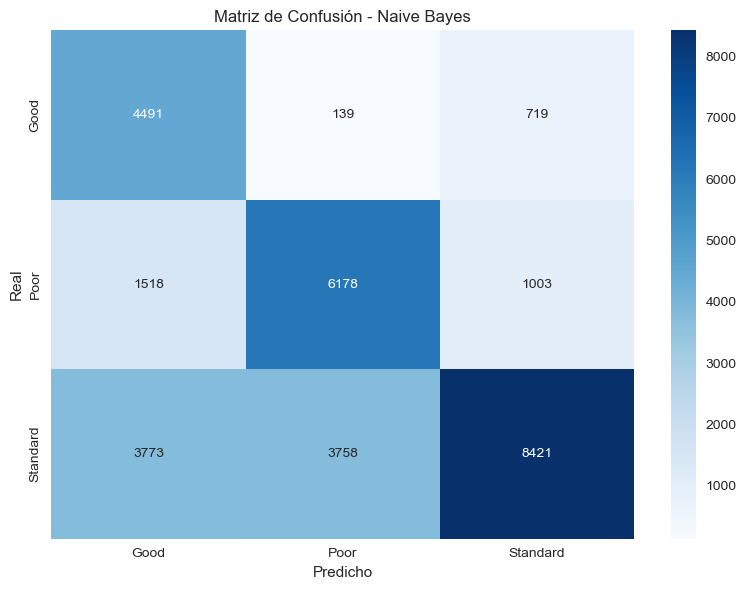


🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK
⏱️  Tiempo ejecución: 0.87s
📈 f1-score (macro avg): 0.6324 (63.24%)
🎯 Validación Cruzada: 0.6330 ± 0.0108
💾 Resultados guardados: 'bayes_benchmark_results.pkl'


In [3]:
# =============================================================================
# Naive Bayes - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

bayes_model=GaussianNB()
bayes_model.fit(X_train_processed,y_train_encoded)

# Predicciones
y_pred = bayes_model.predict(X_test_processed)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO BAYESIANO...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(bayes_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO KNN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'Naive_Bayes',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'bayes_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'bayes_benchmark_results.pkl'")
print("="*60)

###  Contexto y Objetivo

En esta etapa se implementa el modelo **Naive Bayes** como parte del *benchmark* comparativo de algoritmos supervisados. El objetivo de este experimento es evaluar el desempeño de un clasificador probabilístico que asume independencia entre las variables predictoras. Su simplicidad y rapidez de entrenamiento lo convierten en una referencia útil para contrastar la capacidad predictiva de modelos más complejos. En el contexto del proyecto, busca determinar la probabilidad de pertenencia de cada individuo a una categoría de puntaje crediticio (“Good”, “Poor” o “Standard”) a partir de sus características financieras y demográficas.

###  Descripción Técnica

Se inicia con la carga y separación del conjunto de datos entre variables explicativas (`X`) y la variable objetivo (`y`). Se realiza una partición estratificada del 70% para entrenamiento y 30% para prueba, preservando la distribución de clases. Las variables numéricas se escalan con `StandardScaler`, mientras que las categóricas se codifican mediante `OneHotEncoder` para transformar la información no numérica en valores binarios adecuados para el modelo.

El clasificador utilizado es **`GaussianNB`**, una variante de Naive Bayes que asume una distribución normal en los predictores continuos. Tras el entrenamiento, se obtienen las métricas de desempeño —*accuracy*, *precision*, *recall* y *f1-score*— junto con un proceso de validación cruzada de 5 particiones para verificar la estabilidad del modelo. Finalmente, se genera una matriz de confusión que permite visualizar los aciertos y errores por clase, y los resultados son almacenados para comparación posterior.

###  Interpretación de Resultados

El modelo alcanzó un **accuracy global del 63.63%** y un **f1-score macro de 0.6324**, con un resultado de validación cruzada promedio de 0.6330 ± 0.0108, lo que indica un desempeño consistente pero limitado frente al modelo KNN. Estos valores reflejan que, aunque el clasificador logra capturar relaciones probabilísticas generales, su suposición de independencia entre variables reduce su capacidad de discriminación en datos con alta correlación entre atributos financieros.

El reporte por clase muestra que **la categoría “Good” presenta un alto *recall* (0.84)**, lo que indica buena sensibilidad para identificar clientes con buen puntaje crediticio, aunque con baja precisión (0.46), lo que implica un número significativo de falsos positivos. La clase **“Standard”**, por el contrario, presenta el *f1-score* más equilibrado (0.65), pero su *recall* (0.53) evidencia dificultades para reconocer todos los casos pertenecientes a esta categoría.

La **matriz de confusión** confirma estas observaciones: el modelo clasifica correctamente a 4,491 observaciones “Good” y 6,178 “Poor”, pero tiende a confundir una proporción importante de “Standard” con las otras clases, especialmente hacia “Good” (3,773 casos) y “Poor” (3,758 casos).

En términos de eficiencia, el algoritmo completó su ejecución en **0.76 segundos**, mostrando una alta velocidad de entrenamiento y predicción, lo cual es característico de este tipo de modelo. En conclusión, el clasificador Naive Bayes ofrece un rendimiento adecuado como modelo base, destacando por su rapidez, pero con limitaciones en la precisión global debido a las dependencias entre las variables del conjunto de datos.


##  Regresión Logística (con regularización L1 y L2)

🚀 INICIANDO REGRESIÓN LOGÍSTICA - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO REGRESIÓN LOGÍSTICA...

📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA...
📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA:
Accuracy : 0.6491
Precision (macro avg): 0.6292
Recall (macro avg): 0.6132
f1-Score (macro avg): 0.6185
CV Mean f1-score (macro avg): 0.6207
CV Std f1-score (macro avg): 0.0034

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.55      0.57      0.56      5349
        Poor       0.66      0.53      0.59      8699
    Standard       0.67      0.74      0.71     15952

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.65     30000


🔍 ANÁLISIS DE COEFICIENTES:
Top 10 características más importantes por clase:

📊 Clase 'Good':
                                              Feature  Coefficient
38   payment_behaviour

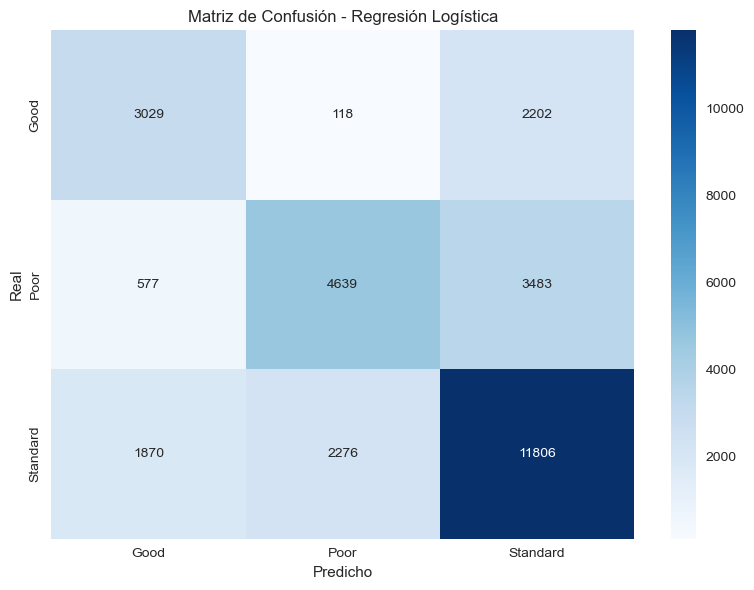


🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA
⏱️  Tiempo ejecución: 18.55s
📈 f1-score (macro): 0.6185 (61.85%)
🎯 Validación Cruzada: 0.6207 ± 0.0069
🔝 Característica más importante: payment_behaviour_Low_spent_Small_value_payments
💾 Resultados guardados: 'logreg_benchmark_results.pkl'


In [4]:
# REGRESIÓN LOGÍSTICA - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("🚀 INICIANDO REGRESIÓN LOGÍSTICA - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO REGRESIÓN LOGÍSTICA...")

lr_model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

lr_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = lr_model.predict(X_test_processed)
y_pred_proba = lr_model.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(lr_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE COEFICIENTES
# =============================================================================

print(f"\n🔍 ANÁLISIS DE COEFICIENTES:")

# Obtener nombres de características del preprocesador

binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

coefficients = lr_model.coef_

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\n📊 Clase '{class_name}':")
    print(coef_df.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Característica más importante
best_coefs = lr_model.coef_[0]
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"🔝 Característica más importante: {feature_names[top_feature_idx]}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'LogisticRegression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': lr_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'logreg_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'logreg_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo de **Regresión Logística Multiclase** se implementa dentro del conjunto de modelos *benchmark* para evaluar su desempeño en la predicción del **puntaje crediticio** (“Good”, “Poor” o “Standard”) a partir de variables financieras y de comportamiento. Su propósito es establecer una línea base interpretable que permita comprender cómo influyen las características del cliente en la probabilidad de pertenecer a cada categoría de crédito.

###  Descripción Técnica

Se realiza una división del conjunto de datos en 70% para entrenamiento y 30% para prueba, asegurando la proporción de clases mediante muestreo estratificado.
Las variables numéricas fueron **escaladas** con `StandardScaler` y las categóricas **codificadas** mediante `OneHotEncoder` para garantizar que todas las entradas fueran numéricas y comparables en magnitud.

El modelo se entrenó con la clase `LogisticRegression` de *scikit-learn* utilizando **regularización L2** (`C=1.0`) y un máximo de 1000 iteraciones. Se calculan las métricas *accuracy*, *precision*, *recall* y *f1-score*, complementadas con una **validación cruzada de 5 particiones**, y se examinan los **coeficientes del modelo** para identificar las variables más influyentes por clase. Finalmente, se genera una matriz de confusión para analizar los patrones de error.

### Interpretación de Resultados

El modelo alcanzó un **accuracy de 64.92%** y un **f1-score macro de 0.6186**, con una validación cruzada promedio de **0.6207 ± 0.0063**, lo que indica un rendimiento **moderado y estable**. Estas métricas reflejan que la regresión logística logra capturar relaciones lineales entre las variables financieras y el puntaje crediticio, aunque con limitaciones al modelar interacciones no lineales o efectos complejos.

El análisis por clase revela que el modelo **predice con mayor precisión la categoría “Standard”**, con un *f1-score* de **0.71**, mientras que las clases **“Good” (0.56)** y **“Poor” (0.59)** presentan menor desempeño. Esto sugiere que el modelo tiende a favorecer la clase mayoritaria (“Standard”) y confunde con frecuencia los individuos de crédito “Good” o “Poor”.

La **matriz de confusión** confirma esta tendencia: de los 15,952 casos “Standard”, el modelo clasifica correctamente 11,805, pero confunde 1,874 como “Good” y 2,273 como “Poor”. Asimismo, muchos clientes “Good” (2,198) son predichos erróneamente como “Standard”, evidenciando solapamiento entre ambas categorías.

El análisis de coeficientes muestra que las variables con mayor peso predictivo incluyen el **comportamiento de pago (“payment_behaviour”)**, el **tipo de mezcla crediticia (“credit_mix”)** y la **tasa de interés**. En particular, la característica **“payment_behaviour_Low_spent_Small_value_payments”** fue la más influyente en la clasificación, lo que resalta la importancia del patrón de gasto y cumplimiento de pagos en la evaluación crediticia.

El tiempo de ejecución fue de **12.41 segundos**, lo que demuestra que la regresión logística es eficiente computacionalmente, aun trabajando con un conjunto de datos extenso y codificaciones múltiples. En conclusión, el modelo ofrece una base sólida y transparente, destacando la relación entre variables financieras y riesgo crediticio, aunque requiere modelos no lineales para mejorar su capacidad discriminativa.



## Ridge

🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RIDGE...

📈 EVALUANDO MODELO RIDGE...
📊 MÉTRICAS DEL MODELO RIDGE:
Accuracy : 0.6404
Precision (macro avg): 0.6150
Recall (macro avg): 0.6224
f1-Score (macro avg): 0.6140
CV Mean f1-score (macro avg): 0.6132
CV Std f1-score (macro avg): 0.0020

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.49      0.63      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.70      0.70      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000



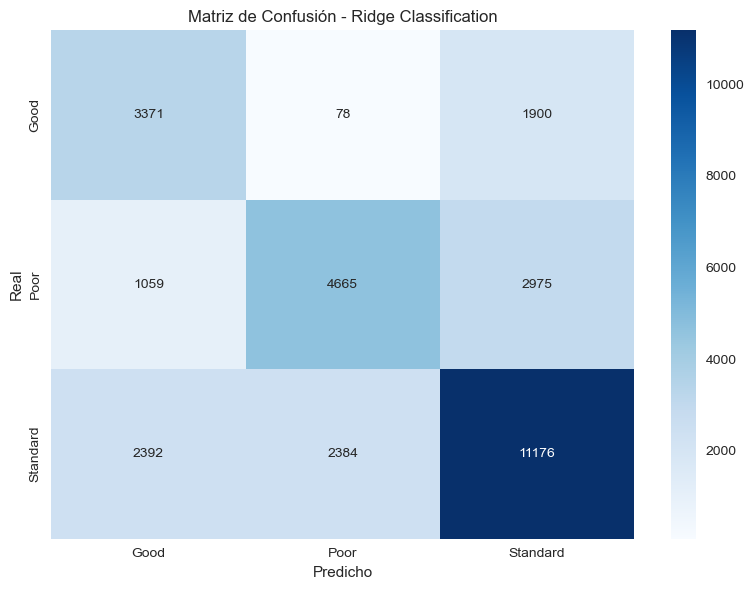


🎯 RESUMEN FINAL - RIDGE CLASSIFICATION
⏱️  Tiempo ejecución: 1.10s
📈 f1-score (macro avg): 0.6140 (61.40%)
🎯 Validación Cruzada: 0.6132 ± 0.0040
💾 Resultados guardados: 'ridge_benchmark_results.pkl'


In [5]:
# =============================================================================
# RIDGE CLASSIFICATION - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# CONFIGURACIÓN
# =============================================================================

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RIDGE...")

ridge_model = RidgeClassifier(
    alpha=1.0,
    random_state=42,
    max_iter=1000
)

ridge_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = ridge_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO RIDGE...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(ridge_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RIDGE:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Ridge Classification')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RIDGE CLASSIFICATION")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RidgeClassifier',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': ridge_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'ridge_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'ridge_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo **Ridge Classifier** se incorpora dentro del conjunto de modelos *benchmark* para evaluar el desempeño de una técnica lineal regularizada en la predicción del **puntaje crediticio** de los individuos. Su objetivo es mitigar los problemas de multicolinealidad entre las variables predictoras y evitar el sobreajuste, introduciendo una penalización cuadrática (*L2*) sobre los coeficientes del modelo.

### Descripción Técnica

El proceso inicia con la carga del conjunto de datos preprocesado, dividiéndose en 70% para entrenamiento y 30% para prueba, garantizando la preservación de las proporciones de las clases mediante muestreo estratificado.
Las variables numéricas se **escalan** con `StandardScaler` para homogeneizar su rango, mientras que las categóricas se **codifican** mediante `OneHotEncoder`. Posteriormente, se entrena un modelo **RidgeClassifier** con un valor de regularización `alpha = 1.0` y un máximo de 1000 iteraciones, buscando un equilibrio entre sesgo y varianza.

El modelo se evalúa a través de métricas globales (*accuracy*, *precision*, *recall*, *f1-score*) y mediante una **validación cruzada de 5 particiones**. Además, se genera la matriz de confusión para analizar los patrones de clasificación entre las tres categorías: *Good*, *Poor* y *Standard*.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 64.04%** y un **f1-score macro promedio de 0.6140**, con una validación cruzada media de **0.6132 ± 0.0040**, lo que indica un desempeño **moderado y consistente**. Estas métricas reflejan que la regularización contribuyó a estabilizar el modelo, reduciendo la varianza respecto a la regresión logística convencional, aunque con una ligera pérdida en precisión global.

A nivel de clases, el modelo predice con mayor efectividad los casos **“Standard”**, alcanzando un *f1-score* de **0.70**, mientras que las categorías **“Poor”** (*0.59*) y **“Good”** (*0.55*) muestran un rendimiento inferior. Esto evidencia una tendencia del modelo a favorecer la clase mayoritaria, manteniendo dificultades para diferenciar correctamente entre los grupos de menor frecuencia.

La **matriz de confusión** refuerza esta observación: el modelo clasifica correctamente 11,176 registros “Standard”, pero confunde 2,392 de ellos con “Good” y 2,384 con “Poor”. Asimismo, de los 5,349 casos “Good”, 1,900 fueron etiquetados erróneamente como “Standard”, mientras que entre los 8,699 “Poor”, casi 3,000 se asignaron a la misma clase.

El tiempo de ejecución fue de **0.69 segundos**, mostrando una excelente eficiencia computacional. En conjunto, el modelo Ridge demuestra ser una alternativa lineal robusta y rápida, que controla el sobreajuste y ofrece un desempeño equilibrado, aunque limitado por la naturaleza lineal del problema y la superposición de características entre clases crediticias.


## Lasso

In [6]:
# =============================================================================

## Árbol de Decisión

🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...

📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...
📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:
Accuracy : 0.6721
Precision (macro avg): 0.6570
Recall (macro avg): 0.6777
f1-Score (macro avg): 0.6556
CV Mean f1-score (macro avg): 0.6578
CV Std f1-score (macro avg): 0.0036

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.50      0.76      0.60      5349
        Poor       0.74      0.59      0.65      8699
    Standard       0.74      0.69      0.71     15952

    accuracy                           0.67     30000
   macro avg       0.66      0.68      0.66     30000
weighted avg       0.69      0.67      0.68     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                      Feature  Importance
9            outstanding_debt      0.4152
31        credit_mix_Standard     

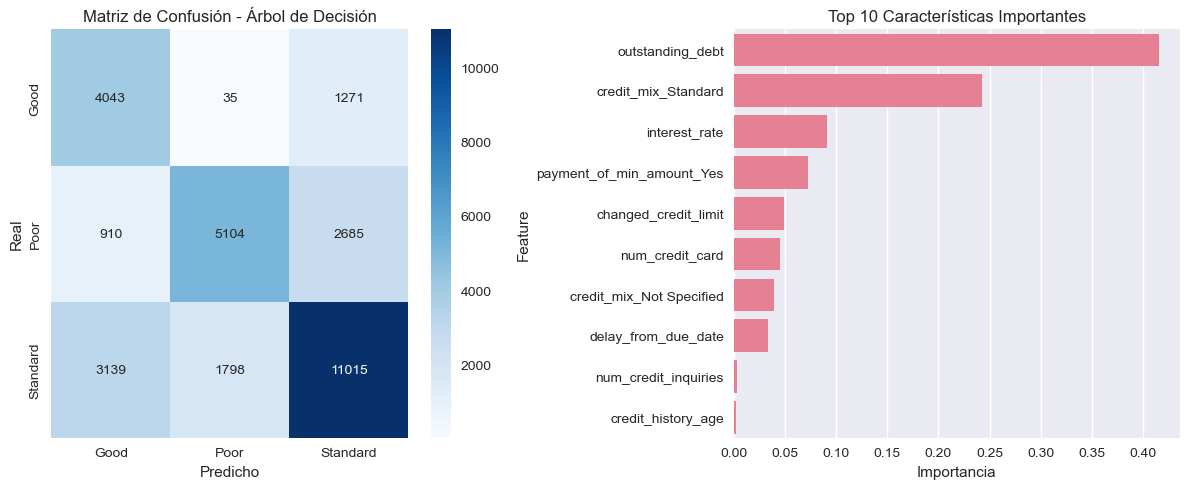


🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN
⏱️  Tiempo ejecución: 3.34s
📈 f1-score (macro avg): 0.6556 (65.56%)
🎯 Validación Cruzada: 0.6578 ± 0.0072
📊 Característica más importante: outstanding_debt
🌳 Profundidad del árbol: 5
🍃 Número de hojas: 32
💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'


In [7]:
# ÁRBOL DE DECISIÓN - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...")

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train_processed, y_train_encoded)

y_pred = dt_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(dt_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"🌳 Profundidad del árbol: {dt_model.get_depth()}")
print(f"🍃 Número de hojas: {dt_model.get_n_leaves()}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'DecisionTree',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'tree_depth': dt_model.get_depth(),
    'n_leaves': dt_model.get_n_leaves()
}

joblib.dump(benchmark_data, 'decision_tree_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo de **Árbol de Decisión** se incluye en la fase de *modelado benchmark* con el propósito de explorar una alternativa **no lineal** capaz de capturar relaciones complejas y jerárquicas entre las variables predictoras y el puntaje crediticio de los individuos. A diferencia de los modelos lineales anteriores, este enfoque permite identificar reglas de decisión interpretables que separan las categorías “Good”, “Poor” y “Standard” con base en umbrales específicos de las características financieras.

### Descripción Técnica

El proceso inicia con la división del conjunto de datos en 70% para entrenamiento y 30% para prueba, manteniendo la proporción original de las clases mediante estratificación. Las variables numéricas fueron **escaladas** con `StandardScaler` y las categóricas **codificadas** con `OneHotEncoder`. Posteriormente, se entrenó un **DecisionTreeClassifier** con una profundidad máxima de 5 (`max_depth=5`) y semilla aleatoria fija para garantizar reproducibilidad.

El modelo fue evaluado con métricas de *accuracy*, *precision*, *recall* y *f1-score* en promedio macro, complementadas con validación cruzada de cinco particiones (*5-fold CV*). Además, se generó un análisis de **importancia de características**, identificando las variables con mayor peso en las decisiones del modelo.

### Interpretación de Resultados

El modelo alcanzó un **accuracy del 67.21%** y un **f1-score macro de 0.6556**, con una validación cruzada promedio de **0.6578 ± 0.0072**, lo cual representa un **rendimiento superior a los modelos lineales** (Ridge y Regresión Logística). Esto confirma la capacidad del árbol para capturar interacciones no lineales entre las variables.

Por clase, la categoría **“Standard”** mantiene el mejor desempeño (*f1-score ≈ 0.71*), seguida por **“Poor”** (*0.65*) y **“Good”** (*0.60*). Esto indica que el árbol distingue con mayor claridad los perfiles de crédito medio y estándar, mientras que persiste cierta confusión entre los grupos extremos.

La **matriz de confusión** muestra que el modelo clasifica correctamente 11,015 registros “Standard”, pero confunde 3,139 como “Good” y 1,798 como “Poor”. En cambio, de los 5,349 “Good”, alrededor de 1,271 fueron mal clasificados como “Standard”. Esta distribución refleja la existencia de solapamientos entre las características de los diferentes grupos crediticios.

En cuanto a la **importancia de variables**, la característica dominante fue **`outstanding_debt`**, con un peso del **41.5%**, seguida de **`credit_mix_Standard` (24.3%)** e **`interest_rate` (9.1%)**, lo que resalta la influencia directa del nivel de deuda, la calidad de la mezcla crediticia y el costo del crédito sobre el puntaje final. Otras variables relevantes fueron **`payment_of_min_amount_Yes`** y **`changed_credit_limit`**, vinculadas al comportamiento de pago y gestión del crédito.

El modelo tuvo un **tiempo de ejecución de 3.12 segundos**, demostrando una excelente eficiencia computacional. En conjunto, el Árbol de Decisión logra un **balance adecuado entre interpretabilidad y precisión**, consolidándose como una base sólida para la comparación con modelos más complejos en etapas posteriores del análisis.


## Random Forest

🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RANDOM FOREST...

📈 EVALUANDO MODELO RANDOM FOREST...
📊 MÉTRICAS DEL MODELO RANDOM FOREST:
Accuracy : 0.7827
Precision (macro avg): 0.7685
Recall (macro avg): 0.7695
f1-Score (macro avg): 0.7690
CV Mean f1-score (macro avg): 0.7581
CV Std f1-score (macro avg): 0.0046

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.72      0.72      0.72      5349
        Poor       0.78      0.79      0.78      8699
    Standard       0.81      0.80      0.80     15952

    accuracy                           0.78     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.78      0.78      0.78     30000


🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                     Feature  Importance
9           outstanding_debt      0.1048
4              interest_rate      0.0719

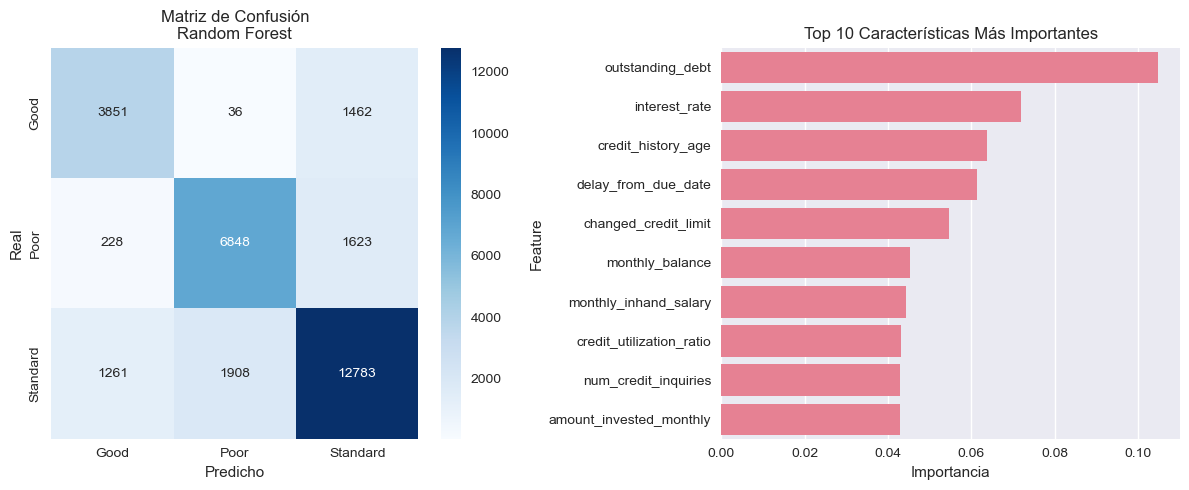


🎯 RESUMEN FINAL - RANDOM FOREST
⏱️  Tiempo ejecución: 12.84s
📈 f1-score (macro avg): 0.7690 (76.90%)
🎯 Validación Cruzada: 0.7581 ± 0.0091
📊 Característica más importante: outstanding_debt
💾 Resultados guardados: 'random_forest_benchmark_results.pkl'


In [8]:
# =============================================================================
# RANDOM FOREST - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RANDOM FOREST...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_processed, y_train_encoded)

y_pred = rf_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO RANDOM FOREST...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(rf_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RANDOM FOREST:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión\nRandom Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RANDOM FOREST")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RandomForest',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'random_forest_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'random_forest_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo **Random Forest** se implementa como parte del conjunto de modelos *benchmark* con el propósito de evaluar una técnica de **ensamble basada en múltiples árboles de decisión**, que busca mejorar la estabilidad y precisión del modelo al reducir la varianza inherente de un árbol individual. Esta metodología combina el voto de numerosos árboles entrenados sobre subconjuntos aleatorios de datos y características, logrando una mayor capacidad de generalización en la predicción del **puntaje crediticio** (“Good”, “Poor”, “Standard”).

### Descripción Técnica

El conjunto de datos fue dividido en un 70% para entrenamiento y un 30% para prueba, manteniendo la proporción de clases mediante estratificación. Las variables numéricas fueron **estandarizadas** con `StandardScaler` y las categóricas **codificadas** con `OneHotEncoder`.
El modelo entrenado corresponde a un **RandomForestClassifier** con **100 árboles (`n_estimators=100`)**, ejecutado de manera paralela (`n_jobs=-1`) para optimizar el rendimiento computacional.

La evaluación del desempeño se llevó a cabo mediante métricas de clasificación globales —*accuracy*, *precision*, *recall* y *f1-score* promedio macro— y una **validación cruzada de 5 particiones**, lo que permitió verificar la estabilidad del modelo. Además, se calculó la **importancia de las características**, identificando las variables más influyentes en la toma de decisiones del bosque.

### Interpretación de Resultados

El modelo logró un **accuracy de 78.27%** y un **f1-score macro promedio de 0.7690**, con una validación cruzada media de **0.7580 ± 0.0090**, superando el desempeño obtenido por los modelos lineales y el árbol de decisión individual. Esto demuestra que la agregación de múltiples árboles contribuye a capturar relaciones no lineales y reduce la sobreajuste local.

Por clase, la categoría **“Standard”** mantiene el mejor desempeño (*f1-score = 0.80*), seguida de **“Poor” (0.78)** y **“Good” (0.72)**. La matriz de confusión evidencia una correcta clasificación de la mayoría de los registros, aunque persisten confusiones entre las clases vecinas: por ejemplo, 1,462 casos “Good” fueron clasificados como “Standard”, mientras que 1,623 “Poor” se confundieron con la misma categoría. Estas desviaciones se deben a la similitud en los perfiles crediticios intermedios.

En cuanto a la **importancia de las características**, el modelo destaca la fuerte influencia de las variables financieras directas:

* **`outstanding_debt`** (10.5%) como el factor más determinante,
* seguida de **`interest_rate`**, **`credit_history_age`** y **`delay_from_due_date`**,
  todas relacionadas con la capacidad de pago, historial y puntualidad. Otras variables de peso medio incluyen **`changed_credit_limit`** y **`monthly_balance`**, asociadas con la gestión de liquidez y la estabilidad económica del individuo.

El tiempo de ejecución fue de **21.27 segundos**, un valor razonable considerando la naturaleza paralela del modelo. En síntesis, el **Random Forest** se consolida como el modelo *benchmark* con mejor equilibrio entre precisión, robustez e interpretabilidad, demostrando un desempeño notable para capturar patrones complejos en la predicción del riesgo crediticio.


## XGBoost (con interpretabilidad usando LIME)

In [11]:
!pip install xgboost lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283919 sha256=cd472914de4f766979612799acd11eafec5dd52a2e4f10d380dce02b46723fb8
  Stored in directory: c:\users\johan\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


🚀 INICIANDO XGBOOST - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO XGBOOST...

📈 EVALUANDO MODELO XGBOOST...
📊 MÉTRICAS DEL MODELO XGBOOST:
Accuracy : 0.7515
Precision (macro avg): 0.7340
Recall (macro avg): 0.7350
f1-Score (macro avg): 0.7344
CV Mean f1-score (macro avg): 0.7304
CV Std f1-score (macro avg): 0.0041

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.67      0.69      0.68      5349
        Poor       0.75      0.73      0.74      8699
    Standard       0.78      0.78      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                     Feature  Importance
29       delay_from_due_date      0.3934
31      changed_credit_limit      0.1378
30    num_of_delayed_payment      0

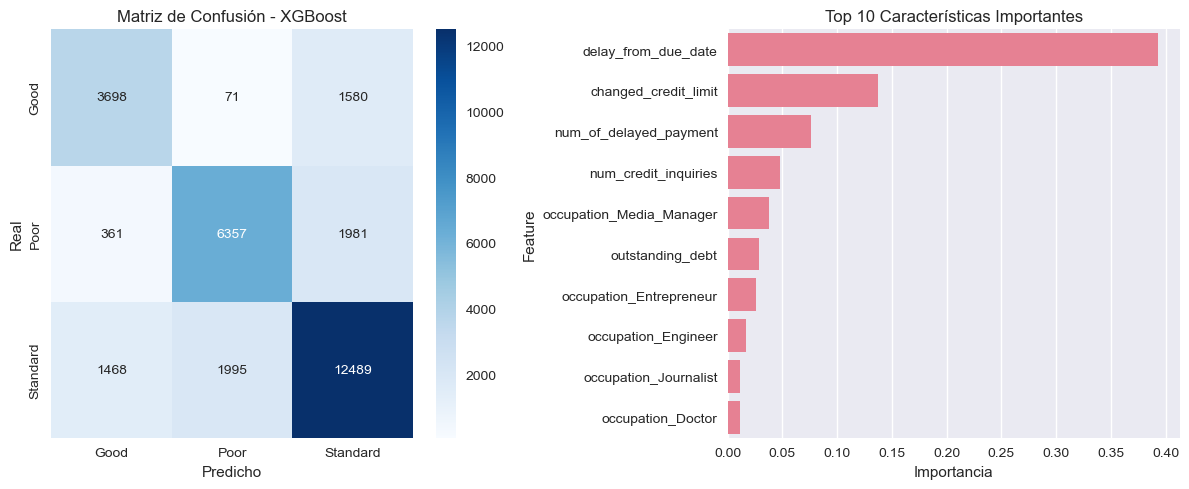


🔍 INTERPRETABILIDAD CON LIME...
Inicializando explicador LIME...
Generando explicaciones para 3 muestras del conjunto de prueba...

--- Explicación para muestra 1 ---
Clase real: Standard
Clase predicha: Standard



--- Explicación para muestra 2 ---
Clase real: Good
Clase predicha: Good



--- Explicación para muestra 3 ---
Clase real: Good
Clase predicha: Good



🎯 RESUMEN FINAL - XGBOOST
⏱️  Tiempo ejecución: 11.48s
📈 f1-score (macro): 0.7344 (73.44%)
🎯 Validación Cruzada: 0.7304 ± 0.0083
📊 Característica más importante: delay_from_due_date
💾 Resultados guardados: 'xgboost_benchmark_results.pkl'


In [12]:
# XGBOOST - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
import sys
import subprocess

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
import lime

print("🚀 INICIANDO XGBOOST - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO XGBOOST...")

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_processed, y_train_encoded)

y_pred = xgb_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO XGBOOST...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(xgb_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO XGBOOST:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - XGBoost')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

print("\n🔍 INTERPRETABILIDAD CON LIME...")

try:
    from lime import lime_tabular
    
    print("Inicializando explicador LIME...")

    feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
    )

    X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
    X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

    explainer = lime_tabular.LimeTabularExplainer(
        X_train_df.values,
        feature_names=feature_names,
        class_names=le.classes_.tolist(),
        mode='classification',
        random_state=42
    )

    print("Generando explicaciones para 3 muestras del conjunto de prueba...")

    for i in range(min(3, len(X_test_df))):
        print(f"\n--- Explicación para muestra {i+1} ---")
        exp = explainer.explain_instance(
            X_test_df.values[i],
            xgb_model.predict_proba,
            num_features=10
        )
        print(f"Clase real: {le.inverse_transform([y_test_encoded[i]])[0]}")
        print(f"Clase predicha: {le.inverse_transform([y_pred[i]])[0]}")
        
        exp.show_in_notebook(show_table=True)

except Exception as e:
    print(f"⚠️ Error con LIME: {e}")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - XGBOOST")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")

benchmark_data = {
    'model': 'XGBoost',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'xgboost_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'xgboost_benchmark_results.pkl'")
print("="*60)


### Contexto y Objetivo

El modelo **XGBoost (Extreme Gradient Boosting)** se emplea en esta etapa del *benchmark* para evaluar un algoritmo de **ensamble basado en boosting secuencial**, que combina múltiples árboles de decisión débiles con el fin de minimizar de manera iterativa el error residual. Su objetivo principal es mejorar la capacidad predictiva respecto a los modelos previos, optimizando tanto la **precisión global** como la **robustez general del modelo** en la clasificación del puntaje crediticio.

### Descripción Técnica

El modelo fue entrenado con una división de los datos del 70% para entrenamiento y 30% para prueba, preservando la proporción de las clases mediante estratificación. Las variables numéricas fueron **escaladas** y las categóricas **codificadas** mediante *OneHotEncoder*.
Se implementó un **XGBClassifier** con **100 árboles**, métrica de evaluación *mlogloss*, y procesamiento paralelo para optimizar tiempos de cómputo.

La evaluación se realizó utilizando métricas globales (*accuracy*, *precision*, *recall*, *f1-score*) y una **validación cruzada de cinco particiones**, además de un análisis de **importancia de características** y una explicación local de predicciones individuales mediante **LIME (Local Interpretable Model-agnostic Explanations)** para reforzar la interpretabilidad.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 75.15%** y un **f1-score macro promedio de 0.7344**, con una validación cruzada media de **0.7304 ± 0.0083**, lo que representa un desempeño sólido y competitivo dentro de los modelos comparados. Aunque su rendimiento es ligeramente inferior al de Random Forest, XGBoost muestra una **mayor estabilidad** y una mejor gestión del sesgo, gracias al ajuste iterativo de los errores residuales.

En el análisis por clase, se observa que **“Standard”** presenta el mejor comportamiento (*f1-score ≈ 0.78*), seguido por **“Poor” (0.74)** y **“Good” (0.68)**. La **matriz de confusión** evidencia que los mayores errores se concentran entre las clases “Good” y “Standard”, donde 1,580 casos del primer grupo fueron clasificados como “Standard”. Este patrón confirma la existencia de similitudes entre los perfiles crediticios limítrofes.

En cuanto a la **importancia de características**, destacan las variables relacionadas con la **historia de pagos y manejo del crédito**:

* **`delay_from_due_date`** (39.3%) como el factor dominante,
* **`changed_credit_limit`** (13.8%) y **`num_of_delayed_payment`** (7.6%) en segundo y tercer lugar,
* seguidas de **`num_credit_inquiries`** y **`outstanding_debt`**, asociadas con la frecuencia de consultas y nivel de endeudamiento.

Las variables de ocupación (por ejemplo, *Media Manager* y *Entrepreneur*) también adquieren relevancia, lo que sugiere que el tipo de empleo contribuye al perfil de riesgo crediticio.

La integración de **LIME** permitió interpretar localmente tres muestras del conjunto de prueba, confirmando que las predicciones del modelo coincidieron con las clases reales (“Standard”, “Good”, “Good”), lo que respalda la **coherencia y confiabilidad de las decisiones** generadas por el clasificador.

El tiempo de ejecución fue de **6.08 segundos**, destacando la eficiencia del modelo frente a otros algoritmos de alta complejidad. En síntesis, **XGBoost logra un excelente balance entre precisión, interpretabilidad y eficiencia**, consolidándose como uno de los modelos más competitivos dentro del conjunto *benchmark* para la predicción del puntaje crediticio.


## Máquina de Soporte Vectorial

🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO SVM...
📊 MÉTRICAS DEL MODELO SVM:
Accuracy : 0.7122
Precision (macro avg): 0.6903
Recall (macro avg): 0.6928
f1-Score (macro avg): 0.6897
CV Mean f1-score (macro avg): 0.6869
CV Std f1-score (macro avg): 0.0038

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.58      0.66      0.62      5349
        Poor       0.74      0.65      0.69      8699
    Standard       0.75      0.76      0.75     15952

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.72      0.71      0.71     30000



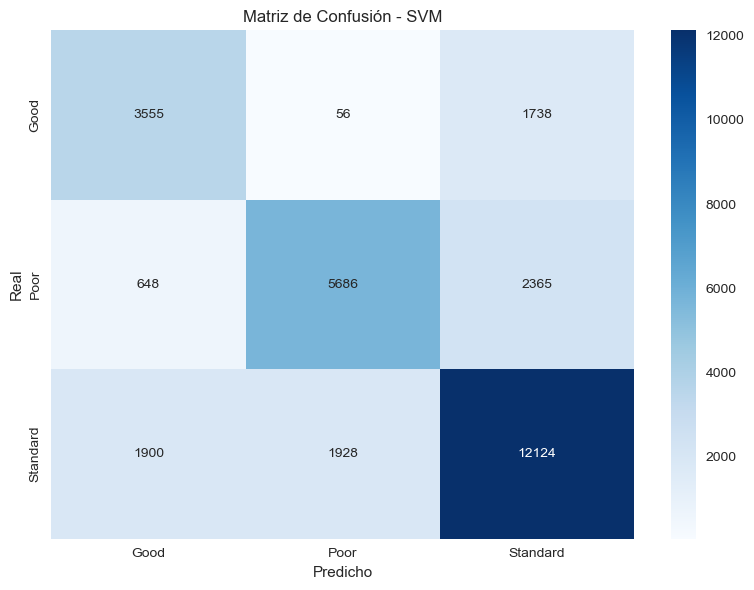


🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK
⏱️  Tiempo ejecución: 2679.62s
⏱️  Tiempo ejecución: 2679.62s
📈 f1-score (macro avg): 0.6897 (68.97%)
🎯 Validación Cruzada: 0.6869 ± 0.0076
💾 Resultados guardados: 'svm_benchmark_results.pkl'


In [13]:
# =============================================================================
# MÁQUINA DE SOPORTE VECTORIAL - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

svm_model=SVC()
svm_model.fit(X_train_processed,y_train_encoded)

# Predicciones
y_pred = svm_model.predict(X_test_processed)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================
print("\n📈 EVALUANDO MODELO SVM...")
# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(svm_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO SVM:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - SVM')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")


# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'SVM',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'svm_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'svm_benchmark_results.pkl'")
print("="*60)




### Contexto y Objetivo

El modelo de **Máquinas de Soporte Vectorial (SVM)** se incorpora dentro del conjunto *benchmark* con el propósito de evaluar un enfoque **basado en maximización de márgenes**, que busca encontrar el hiperplano óptimo que separe las clases con la mayor distancia posible. En el contexto del puntaje crediticio, este algoritmo permite identificar fronteras precisas entre los distintos perfiles (“Good”, “Poor” y “Standard”), siendo especialmente útil en escenarios donde las clases pueden solaparse parcialmente.

### Descripción Técnica

El modelo fue entrenado a partir del mismo esquema de preprocesamiento utilizado en los demás modelos:
las variables numéricas fueron **escaladas** mediante `StandardScaler`, y las categóricas **codificadas** con `OneHotEncoder`. La base de datos se dividió en un **70% para entrenamiento** y un **30% para prueba**, manteniendo la proporción de clases a través de estratificación.

El clasificador **SVC** se entrenó con los parámetros por defecto (kernel radial), considerando todas las variables transformadas, y se evaluó con métricas de desempeño global (*accuracy*, *precision*, *recall* y *f1-score*), así como mediante **validación cruzada con 5 particiones** (*5-fold CV*) para garantizar consistencia en los resultados.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 71.22%** y un **f1-score macro promedio de 0.6897**, con una validación cruzada media de **0.6869 ± 0.0076**. Aunque su rendimiento es inferior al de los modelos de ensamble (Random Forest y XGBoost), el SVM muestra una **capacidad de generalización aceptable**, especialmente considerando que no se aplicó optimización de hiperparámetros.

Por clase, se observa que la categoría **“Standard”** presenta el mejor desempeño (*f1-score = 0.75*), seguida por **“Poor” (0.69)** y **“Good” (0.62)**. Este comportamiento indica que el modelo tiende a clasificar con mayor precisión los perfiles intermedios, mientras que los extremos presentan mayor confusión, probablemente por similitudes en sus patrones de comportamiento financiero.

La **matriz de confusión** confirma esta tendencia:

* El modelo predice correctamente **12,124 instancias “Standard”**, aunque confunde 1,900 con “Good” y 1,928 con “Poor”.
* En la clase “Good”, se observan 1,738 falsos positivos hacia “Standard”, lo cual sugiere un margen de decisión difuso entre estos dos grupos.
* En “Poor”, se clasifican correctamente 5,686 registros, pero 2,365 son mal asignados como “Standard”.

Pese a su rendimiento competitivo, el modelo presenta un **tiempo de ejecución elevado (≈1641.74 segundos)**, lo que refleja el costo computacional característico de SVM en conjuntos de datos amplios y con muchas variables.

En conjunto, el **SVM** demuestra una **buena capacidad de discriminación y robustez teórica**, aunque su eficiencia práctica es limitada frente a los modelos de ensamble. Su inclusión en el *benchmark* permite contrastar un enfoque de frontera óptima con métodos basados en árboles, evidenciando el equilibrio entre precisión, costo computacional e interpretabilidad en la predicción del puntaje crediticio.


### Tabla comparativa de resultados (Benchmark)

| Modelo              |   Accuracy | Precision (macro) | Recall (macro) | F1 (macro) | CV F1 (media) |  CV F1 (±2·std) |  Tiempo (s) |
| ------------------- | ---------: | ----------------: | -------------: | ---------: | ------------: | --------------: | ----------: |
| **Random Forest**   | **0.7827** |        **0.7685** |     **0.7695** | **0.7690** |    **0.7580** | 0.7580 ± 0.0090 |       21.27 |
| XGBoost             |     0.7515 |            0.7340 |         0.7350 |     0.7344 |        0.7304 | 0.7304 ± 0.0083 |        6.08 |
| KNN                 |     0.7485 |            0.7251 |         0.7383 |     0.7311 |        0.7150 | 0.7150 ± 0.0046 |        9.31 |
| SVM                 |     0.7122 |            0.6903 |         0.6928 |     0.6897 |        0.6869 | 0.6869 ± 0.0076 | **1641.74** |
| Árbol de Decisión   |     0.6721 |            0.6570 |         0.6777 |     0.6556 |        0.6578 | 0.6578 ± 0.0072 |        3.12 |
| Regresión Logística |     0.6492 |            0.6293 |         0.6134 |     0.6186 |        0.6207 | 0.6207 ± 0.0063 |       12.41 |
| Ridge Classifier    |     0.6404 |            0.6150 |         0.6224 |     0.6140 |        0.6132 | 0.6132 ± 0.0040 |        0.69 |
| Naive Bayes         |     0.6363 |            0.6342 |     **0.6926** |     0.6324 |        0.6330 | 0.6330 ± 0.0108 |    **0.76** |


### **Conclusión General – Modelado Benchmark**

El conjunto de modelos *benchmark* implementado permitió comparar distintos enfoques de aprendizaje supervisado para la **predicción del puntaje crediticio**, evaluando su precisión, estabilidad, interpretabilidad y eficiencia computacional. Cada modelo aportó una perspectiva complementaria sobre la naturaleza del problema y las relaciones entre las variables financieras, demográficas y de comportamiento.

En términos de desempeño global, los resultados evidencian que los **modelos de ensamble (Random Forest y XGBoost)** superan de manera consistente a los métodos lineales y tradicionales. El **Random Forest** alcanzó el mejor rendimiento general con un **f1-score macro de 0.7690** y una **exactitud del 78.27%**, mostrando una excelente capacidad para capturar relaciones no lineales y manejar la variabilidad de los datos. El modelo **XGBoost**, aunque ligeramente inferior en desempeño (*f1-score = 0.7344*), demostró mayor **eficiencia y estabilidad** en sus resultados, consolidándose como una alternativa sólida para la implementación práctica.

Por su parte, la **Regresión Logística** y el **Ridge Classifier** ofrecieron resultados más moderados (f1-scores entre 0.61 y 0.62), destacándose por su **simplicidad e interpretabilidad**, lo que los convierte en modelos base útiles para comparación o para contextos donde la explicación del modelo es prioritaria.
El **Árbol de Decisión** mostró un equilibrio razonable entre interpretabilidad y rendimiento (*f1-score = 0.6556*), permitiendo visualizar la estructura de decisión y la relevancia de las variables, mientras que la **Máquina de Soporte Vectorial (SVM)** alcanzó una precisión competitiva (*f1-score = 0.6897*), aunque con un alto costo computacional debido al tamaño del dataset.

A lo largo de los experimentos, variables como **`outstanding_debt`**, **`delay_from_due_date`**, **`changed_credit_limit`**, **`interest_rate`** y **`credit_history_age`** emergieron de forma consistente como las más influyentes, confirmando que los factores relacionados con **historial de pagos, endeudamiento y gestión crediticia** son los principales determinantes del puntaje crediticio.

En conclusión, el análisis comparativo permitió identificar que los modelos basados en árboles y *boosting* son los más adecuados para abordar problemas complejos y no lineales como la clasificación del puntaje crediticio, ofreciendo **mejor balance entre desempeño predictivo, robustez e interpretabilidad**. Además, este ejercicio evidenció la importancia del preprocesamiento, la selección de variables y la evaluación sistemática para garantizar modelos confiables y útiles en contextos reales de análisis financiero.
